[View in Colaboratory](https://colab.research.google.com/github/orico/PCAvsAutoencoder/blob/master/PCA_vs_Autoencoder_tutorial.ipynb)

A lot have been said about the approximating principal component analysis (PCA) by using a linearly activated autoencoder (AE). From a math point of view, it was said that minimizing the reconstruction error in PCA is the same as AE [1]. However, why limit ourselves to linear transformations? AE are very flexible, therefore we can introduce nonlinearities by using nonlinear activation functions [2]. Our Hypothesis is that the subspace spanned by the respective *W* found by AE and PCA will be the same [3].

In this tutorial we'll try to see if that is the case and what are the similarities between the PCA and a linear and non linear AE. Please read [4] if you dont have a background understanding of AE.

[1] [CSC 411: Lecture 14: Principal Components Analysis &
Autoencoders](https://www.cs.toronto.edu/~urtasun/courses/CSC411/14_pca.pdf), page 16.

[2] [A Tutorial on Autoencoders for Deep Learning](https://lazyprogrammer.me/a-tutorial-on-autoencoders/)

[3] [what are the differences between pca and autoencoder](https://stats.stackexchange.com/questions/120080/whatre-the-differences-between-pca-and-autoencoder) 

[4] [building AE in keras](https://blog.keras.io/building-autoencoders-in-keras.html)

In [0]:
import keras
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras.optimizers import Adam
from keras import regularizers
from sklearn import datasets
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

RANDOM_SEED = 37117
np.random.seed(RANDOM_SEED)

Using TensorFlow backend.


First, lets load up the Iris data-set and scale it between [0,1].

In [0]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

Then we use PCA and plot the first two PCs against each other, clearly two clusters emerge.

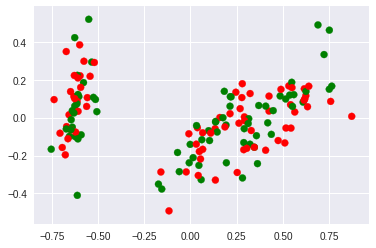

In [0]:
pca = decomposition.PCA()
pca_transformed = pca.fit_transform(X_scaled)
plt.scatter(pca_transformed[:,0],pca_transformed[:,1],color=['red','green'])
plt.show() 

Our first AE has 3 layers, the hidden layer has 3 neurons. The encoded and decoded layers have 'linear activations', essentially this structure approximates PCA with linear transformation.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 16        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None


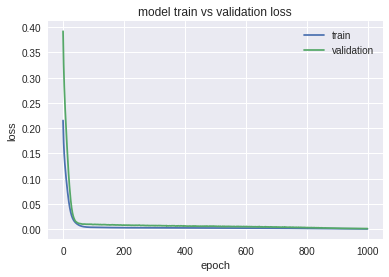

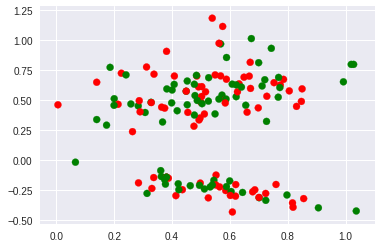

In [0]:
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim = X_scaled.shape[1]
encoding_dim = 3  
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='linear')(input_img)
decoded = Dense(input_dim, activation='linear')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
print(autoencoder.summary())

history = autoencoder.fit(X_scaled, X_scaled,
                epochs=1000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoded_data = encoder.predict(X_scaled)

plt.scatter(encoded_data[:,0],encoded_data[:,1],color=['red','green'])
plt.show() 


Our second AE is of similar structure, but the activation functions is a sigmoid. This network structure can be thought of PCA with nonlinear transformation.

Non linear AE using sigmoid.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 16        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None


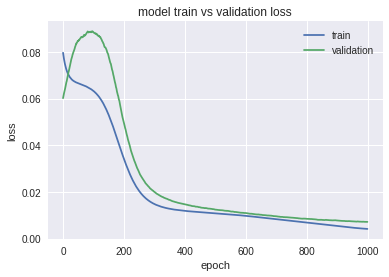

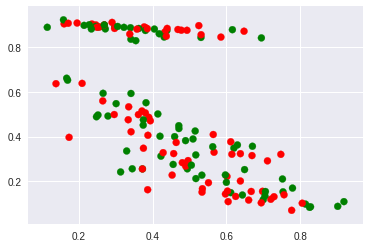

In [0]:
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim2 = X_scaled.shape[1]
encoding_dim2 = 3  
input_img2 = Input(shape=(input_dim2,))
encoded2 = Dense(encoding_dim2, activation='sigmoid')(input_img2)
decoded2 = Dense(input_dim2, activation='sigmoid')(encoded2)
autoencoder2 = Model(input_img2, decoded2)
autoencoder2.compile(optimizer='adam', loss='mse')
print(autoencoder2.summary())

history2 = autoencoder2.fit(X_scaled, X_scaled,
                epochs=1000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder2 = Model(input_img2, encoded2)
encoded_input2 = Input(shape=(encoding_dim2,))
decoder_layer2 = autoencoder2.layers[-1]
decoder2 = Model(encoded_input2, decoder_layer(encoded_input2))
encoded_data2 = encoder2.predict(X_scaled)

plt.scatter(encoded_data2[:,0],encoded_data2[:,1],color=['red','green'])
plt.show()

Our third AE is of similar structure to the second, but the activation functions is a relu with an L2 regularizer. 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 16        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None


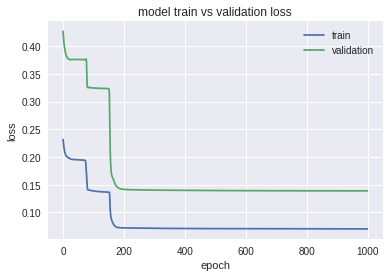

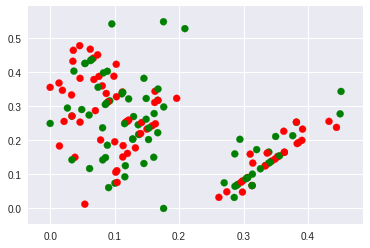

In [0]:
#create an AE and fit it with our data using 3 neurons in the dense layer using keras' functional API
input_dim3 = X_scaled.shape[1]
encoding_dim3 = 3  
input_img3 = Input(shape=(input_dim3,))
encoded3 = Dense(encoding_dim3, activation='relu', activity_regularizer=regularizers.l2(10e-5))(input_img3)
decoded3 = Dense(input_dim3, activation='relu')(encoded3)
autoencoder3 = Model(input_img3, decoded3)
autoencoder3.compile(optimizer='adam', loss='mse')
print(autoencoder3.summary())

history3 = autoencoder3.fit(X_scaled, X_scaled,
                epochs=1000,
                batch_size=16,
                shuffle=True,
                validation_split=0.1,
                verbose = 0)

#plot our loss 
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# use our encoded layer to encode the training input
encoder3 = Model(input_img3, encoded3)
encoded_input3 = Input(shape=(encoding_dim3,))
decoder_layer3 = autoencoder3.layers[-1]
decoder3 = Model(encoded_input3, decoder_layer(encoded_input3))
encoded_data3 = encoder3.predict(X_scaled)

plt.scatter(encoded_data3[:,0],encoded_data3[:,1],color=['red','green'])
plt.show() 


After training the AE's and pushing our training data through the hidden layer, we compare the raw data of the first 3 PCs and the AE's dense features. As we expected, for this data-set, plotting two vectors against each other will result in similar clusters in different configuration. Additionally, printing out the raw data shows a different range of values. Next we would like to compare how a simple KMEANS with 2 clusters labels the data.

In [0]:
print('PCA\n',pca_transformed[:,0:3][0:10])
print()
print('Linear AE\n',encoded_data[0:10])
print()
print('Nonlinear AE with sigmoid\n',encoded_data2[0:10])
print()
print('Nonlinear AE with relu\n',encoded_data3[0:10])


PCA
 [[-0.63036125  0.11155626 -0.01699291]
 [-0.62354631 -0.1003132  -0.04712012]
 [-0.6697928  -0.04722006  0.02164774]
 [-0.65463305 -0.09879127  0.02521415]
 [-0.64826327  0.13755769  0.01681255]
 [-0.534057    0.29322304  0.02673647]
 [-0.65639589  0.01492194  0.09369808]
 [-0.62564396  0.06107532 -0.01226957]
 [-0.67652584 -0.19648232  0.03813164]
 [-0.64613717 -0.06324223 -0.05975369]]

Linear AE
 [[ 0.5855095  -0.25395736  0.01006915]
 [ 0.36283508 -0.13674259  0.0096455 ]
 [ 0.43569985 -0.2466287   0.01247129]
 [ 0.37709484 -0.20026718  0.00998978]
 [ 0.61954886 -0.30067685  0.0108123 ]
 [ 0.7974604  -0.2911114  -0.10175741]
 [ 0.52532643 -0.3149945  -0.04159649]
 [ 0.5316904  -0.2240429   0.00892712]
 [ 0.283815   -0.1897797   0.01172417]
 [ 0.38074812 -0.1423888   0.06232318]]

Nonlinear AE with sigmoid
 [[0.38168183 0.88601196 0.89711887]
 [0.2532338  0.88909304 0.7716994 ]
 [0.24648103 0.89872485 0.8245072 ]
 [0.21462391 0.896681   0.7719113 ]
 [0.3773898  0.88987994 0.908

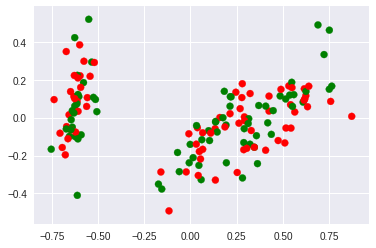

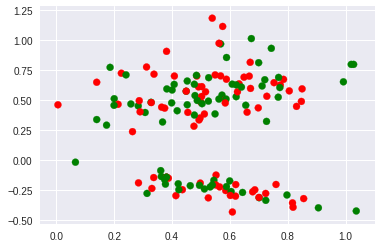

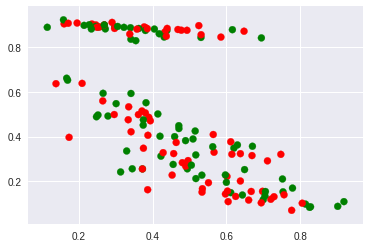

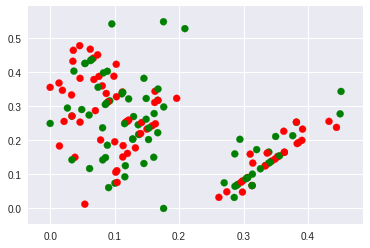

In [0]:
plt.scatter(pca_transformed[:,0],pca_transformed[:,1],color=['red','green'])
plt.show()  

plt.scatter(encoded_data[:,0],encoded_data[:,1],color=['red','green'])
plt.show()  

plt.scatter(encoded_data2[:,0],encoded_data2[:,1],color=['red','green'])
plt.show()  

plt.scatter(encoded_data3[:,0],encoded_data3[:,1],color=['red','green'])
plt.show() 

We would like to know if each dense representation passed through a KMEANS algorithm with 2 classes can label the data similarly. The output in this section clearly shows that the classification achieved by using the output of these 4 algorithms is identical. However, please keep in mind that minor differences can happen due to the random nature of neural networks.

In [0]:
estimators = [('PCA'    , KMeans(n_clusters=2), pca_transformed),
              ('AE linear' , KMeans(n_clusters=2), encoded_data),
              ('AE sigmoid' , KMeans(n_clusters=2), encoded_data2),
              ('AE relu', KMeans(n_clusters=2), encoded_data3)]
fignum = 1
titles = ['PCA', 'Linear AE', 'Sigmoid AE', 'Relu AE']
for name, est, data in estimators:
    X = data
    est.fit(X)
    labels = est.labels_
    print(name,':')
    print(labels[:])

PCA :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
AE linear :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
AE sigmoid :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
AE relu :
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 